1. check lowest rating for each area, and build a restuarant in that particular area
2. 

In [2]:
!pip list

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.6.2
blis                      0.7.11
catalogue                 2.0.10
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.1.4
confection                0.1.4
contourpy                 1.1.0
cycler                    0.11.0
cymem                     2.0.8
debugpy                   1.8.0
decorator                 5.1.1
defusedxml    

In [1]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [2]:
data = pd.read_csv("zomato.csv")
data.head()

NameError: name 'pd' is not defined

In [75]:
data.shape

(7105, 12)

In [76]:
data['area'].value_counts()

area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Whitefield                        261
Marathahalli                      260
HSR                               241
Basavanagudi                      214
New BEL Road                      168
Koramangala 4th Block             162
Rajajinagar                       148
Lavelle Road                      141
Jayanagar                         127
Frazer Town                       126
Sarjapur Road                     108
Old Airport Road                   91
Church Street                      77
Koramangala 6th Block              71
JP Nagar                           69
Kammanahalli                       65
Koraman

In [77]:
low_rate = data[data['rate (out of 5)'] <= 3]
low_rate['area'].value_counts()

area
Bannerghatta Road                 124
Brookefield                       115
Byresandra,Tavarekere,Madiwala    111
Electronic City                   102
Indiranagar                        89
Bellandur                          83
Kalyan Nagar                       70
Brigade Road                       62
HSR                                60
Banashankari                       57
Marathahalli                       56
Whitefield                         46
Malleshwaram                       46
Basavanagudi                       36
Koramangala 4th Block              33
New BEL Road                       28
Old Airport Road                   23
Frazer Town                        21
Sarjapur Road                      20
Rajajinagar                        19
Jayanagar                          18
JP Nagar                           17
Kammanahalli                       10
Lavelle Road                       10
Church Street                      10
MG Road                             6
Koraman

**Bannerghatta Road** have more rating with less than 3

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [79]:
data.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [80]:
#removed unwanted column and null rows
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
data = data.dropna()

In [81]:
data.groupby(['restaurant type'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(10)

restaurant type num of ratings               rate (out of 5)  \
                                         mean  median count            mean   
63           Microbrewery, Pub    5044.000000  5892.0     8        4.462500   
67           Pub, Microbrewery    5154.666667  5068.5     6        4.400000   
57        Lounge, Microbrewery    4650.000000  4650.0     1        3.700000   
24  Casual Dining, Irani Cafee    3651.000000  3651.0     1        4.400000   
59                Microbrewery    6443.000000  3318.5     6        4.216667   
44         Fine Dining, Lounge    2229.000000  2229.0     1        4.400000   
62        Microbrewery, Lounge    2212.000000  2212.0     1        4.200000   
55                Lounge, Cafe    1717.000000  1717.0     1        3.900000   
56       Lounge, Casual Dining    1945.500000  1551.0     6        4.116667   
60           Microbrewery, Bar    1213.000000  1213.0     1        4.400000   

                 
   median count  
63   4.50     8  
67   4.40     6  
57   3.70     1  
24   4.40     1  
59   4.30     6  
44   4.40     1  
62   4.20     1  
55   3.90     1  
56   4.15     6  
60   4.40     1

In [82]:
data['restaurant type'] = data['restaurant type'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [83]:
data.groupby(['restaurant type'], as_index=False)\
    .agg({'num of ratings': ['mean', 'median', 'count'], 'rate (out of 5)' : ['mean', 'median', 'count']})\
    .sort_values(by=([('num of ratings', 'median'), ('rate (out of 5)', 'median')]), ascending=(False, False))\
    .head(10)

restaurant type num of ratings               rate (out of 5)  \
                                          mean  median count            mean   
54            Microbrewery, Pub    5091.428571  5892.0    14        4.435714   
26   Casual Dining, Irani Cafee    3651.000000  3651.0     1        4.400000   
49         Lounge, Microbrewery    3431.000000  3431.0     2        3.950000   
53                 Microbrewery    6443.000000  3318.5     6        4.216667   
42          Fine Dining, Lounge    2229.000000  2229.0     1        4.400000   
10            Bar, Microbrewery    1213.000000  1213.0     1        4.400000   
21                 Cafe, Lounge    1041.500000  1041.5     2        4.150000   
28  Casual Dining, Microbrewery    1376.318182   937.5    22        4.172727   
43    Fine Dining, Microbrewery     755.000000   755.0     1        4.300000   
32                         Club     904.000000   628.0     5        4.020000   

                 
   median count  
54   4.50    14  
26   4.40     1  
49   3.95     2  
53   4.30     6  
42   4.40     1  
10   4.40     1  
21   4.15     2  
28   4.30    22  
43   4.30     1  
32   4.00     5

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


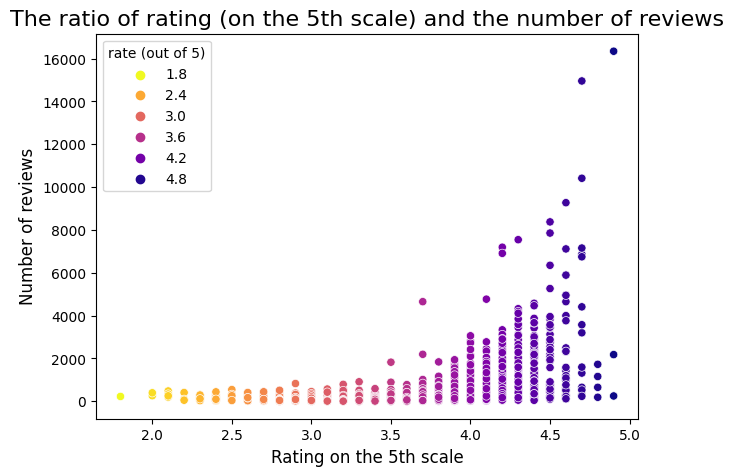

In [85]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, y='num of ratings', x='rate (out of 5)', hue='rate (out of 5)', palette='plasma_r')
plt.title('The ratio of rating (on the 5th scale) and the number of reviews', fontsize=16)
plt.xlabel('Rating on the 5th scale', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)
plt.show()

# Insight1
##### From a rating of ~3.8, we see an increase in the number of reviews

What it might say:

1) good restaurants attract more customers and they leave positive reviews more often, which in turn attracts new customers

2) for bad restaurants, customers provide few reviews.

d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


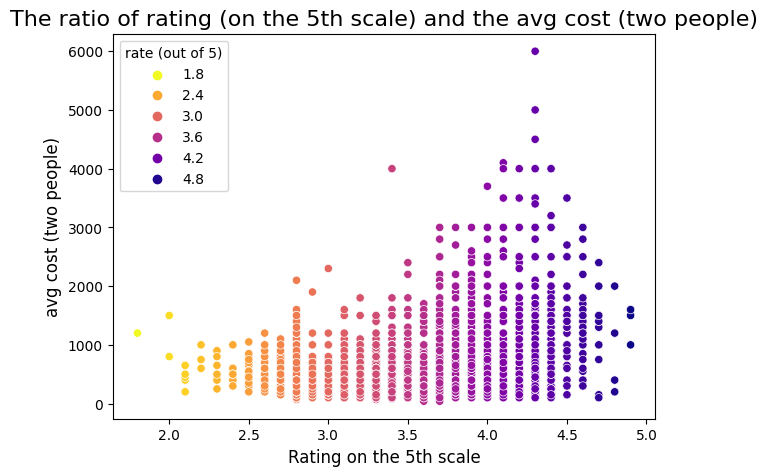

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, y='avg cost (two people)', x='rate (out of 5)', hue='rate (out of 5)', palette='plasma_r')
plt.title('The ratio of rating (on the 5th scale) and the avg cost (two people)', fontsize=16)
plt.xlabel('Rating on the 5th scale', fontsize=12)
plt.ylabel('avg cost (two people)', fontsize=12)
plt.show()

# Insight2
by looking above graph we can say that higher price doesn't mean customers are satisfied and lower price doesn't mean customers are not satisfied

d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Byresandra,Tavarekere,Madiwala'),
  Text(1, 0, 'Bannerghatta Road'),
  Text(2, 0, 'Brookefield'),
  Text(3, 0, 'Brigade Road'),
  Text(4, 0, 'Indiranagar'),
  Text(5, 0, 'Electronic City'),
  Text(6, 0, 'Malleshwaram'),
  Text(7, 0, 'Kalyan Nagar'),
  Text(8, 0, 'Bellandur'),
  Text(9, 0, 'Banashankari')])

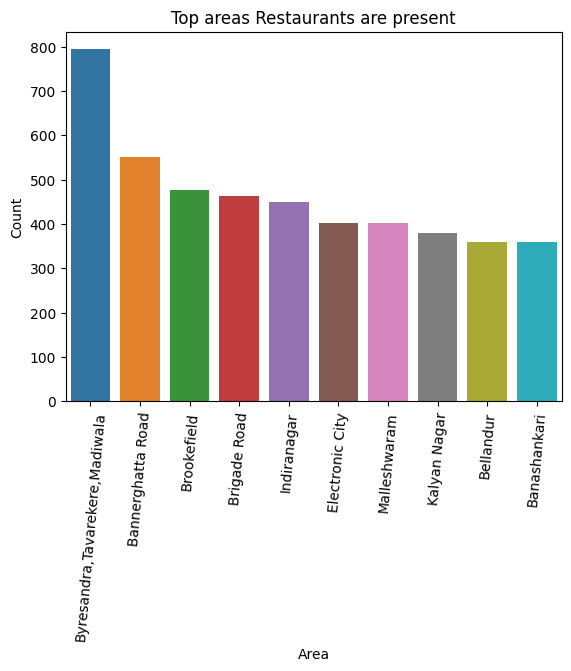

In [87]:
dataCount = data["area"].value_counts().head(10)
sns.barplot(x=dataCount.index, y=dataCount.values)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Top areas Restaurants are present')
plt.xticks(rotation=85)

# Insight3
**Byresandra,Tavarekere,Madiwala** is the top resturant area

In [88]:
top3Res = dataCount.head(3)
top3Res

area
Byresandra,Tavarekere,Madiwala    794
Bannerghatta Road                 552
Brookefield                       477
Name: count, dtype: int64

In [89]:
Byresandra_Tavarekere_Madiwala = data[(data['area'] == 'Byresandra,Tavarekere,Madiwala')]
Bannerghatta_Road = data[(data['area'] == 'Bannerghatta Road')]
Brookefield = data[(data['area'] == 'Brookefield')]

In [90]:
#Calculate mean of avg cost of top 3 Areas
print('Mean')
print('Byresandra_Tavarekere_Madiwala:', np.mean(Byresandra_Tavarekere_Madiwala['avg cost (two people)']))
print('Bannerghatta_Road:', np.mean(Bannerghatta_Road['avg cost (two people)']))
print('Brookefield:', np.mean(Brookefield['avg cost (two people)']))

Mean
Byresandra_Tavarekere_Madiwala: 488.46347607052894
Bannerghatta_Road: 446.97463768115944
Brookefield: 526.8343815513626


d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
d:\Expertzlab\Intern\deployment\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

Text(0.5, 1.0, 'Avg Cost of Top 3 Restuarant Area')

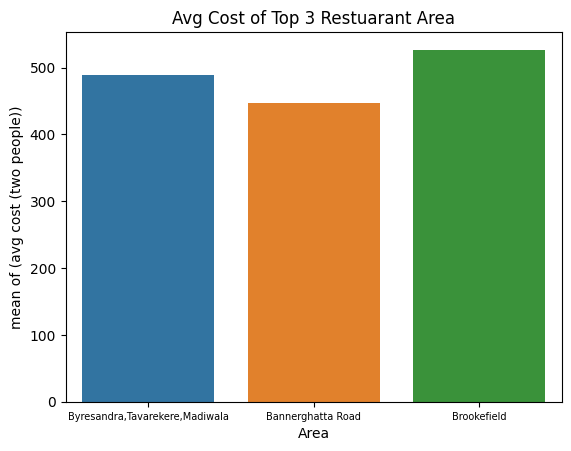

In [91]:
x = ['Byresandra,Tavarekere,Madiwala','Bannerghatta Road','Brookefield']
y = [np.mean(Byresandra_Tavarekere_Madiwala['avg cost (two people)']),np.mean(Bannerghatta_Road['avg cost (two people)']),np.mean(Brookefield['avg cost (two people)'])]

plt.xticks(fontsize=7)
sns.barplot(x=x, y=y)
plt.xlabel('Area')
plt.ylabel('mean of (avg cost (two people))')
plt.title('Avg Cost of Top 3 Restuarant Area')

***Brookefield*** have highest average cost in **Byresandra,Tavarekere,Madiwala** with a mean value of *526.8343815513626*

In [92]:
df = Byresandra_Tavarekere_Madiwala
top_5_Cuisines_type = df['cuisines type'].value_counts().head(5)
# top_5_Cuisines_type

ls = [i for i in top_5_Cuisines_type.index]
count = [i for i in top_5_Cuisines_type]
mean = []

for i in top_5_Cuisines_type.index:
    data_ = df[(df['cuisines type'] == i)]
    mean.append(np.mean(data_['avg cost (two people)']))

header = ['Cuisine Type', 'Count', 'Mean of (avg cost)']
array = [ls, count, mean]
df_array = pd.DataFrame(array)
df_array = df_array.T
df_array.columns = header
df_array

,Cuisine Type,Count,Mean of (avg cost)
0,North Indian,48,389.583333
1,"North Indian, Chinese",46,455.434783
2,South Indian,21,189.047619
3,Fast Food,16,281.25
4,Biryani,13,330.769231


Top Cuisine Type in *Byresandra,Tavarekere,Madiwala*

1. ***North Indian***
2. ***North Indian, Chinese***
3. ***South Indian***
4. ***Fast Food***
5. ***Biryani***

**North Indian, Chinese** are the most earned cuisine type in *Byresandra,Tavarekere,Madiwala*

In [93]:
df = Bannerghatta_Road
top_5_Cuisines_type = df['cuisines type'].value_counts().head(5)

ls = [i for i in top_5_Cuisines_type.index]
count = [i for i in top_5_Cuisines_type]
mean = []

for i in top_5_Cuisines_type.index:
    data_ = df[(df['cuisines type'] == i)]
    mean.append(np.mean(data_['avg cost (two people)']))

header = ['Cuisine Type', 'Count', 'Mean of (avg cost)']
array = [ls, count, mean]
df_array = pd.DataFrame(array)
df_array = df_array.T
df_array.columns = header
df_array

,Cuisine Type,Count,Mean of (avg cost)
0,"North Indian, Chinese",39,464.102564
1,North Indian,34,454.411765
2,"South Indian, North Indian, Chinese",16,396.875
3,South Indian,15,210.0
4,Fast Food,14,260.714286


Top Cuisine Type in *Bannerghatta Road*

1. ***North Indian, Chinese***
2. ***North Indian***
3. ***South Indian, North Indian, Chinese***
4. ***South Indian***
5. ***Fast Food***

**North Indian, Chinese** are the most earned cuisine type in *Bannerghatta Road*

In [94]:
df = Brookefield
top_5_Cuisines_type = df['cuisines type'].value_counts().head(5)

ls = [i for i in top_5_Cuisines_type.index]
count = [i for i in top_5_Cuisines_type]
mean = []

for i in top_5_Cuisines_type.index:
    data_ = df[(df['cuisines type'] == i)]
    mean.append(np.mean(data_['avg cost (two people)']))

header = ['Cuisine Type', 'Count', 'Mean of (avg cost)']
array = [ls, count, mean]
df_array = pd.DataFrame(array)
df_array = df_array.T
df_array.columns = header
df_array

,Cuisine Type,Count,Mean of (avg cost)
0,North Indian,47,461.702128
1,"North Indian, Chinese",37,456.756757
2,South Indian,18,355.555556
3,"South Indian, North Indian, Chinese",9,366.666667
4,"North Indian, Chinese, Biryani",7,464.285714


Top Cuisine Type in *Brookefield*

1. ***North Indian***
2. ***North Indian, Chinese***
3. ***South Indian***
4. ***South Indian, North Indian, Chinese***
5. ***North Indian, Chinese, Biryani***

**North Indian, Chinese, Biryani** are the most earned cuisine type in *Brookefield*

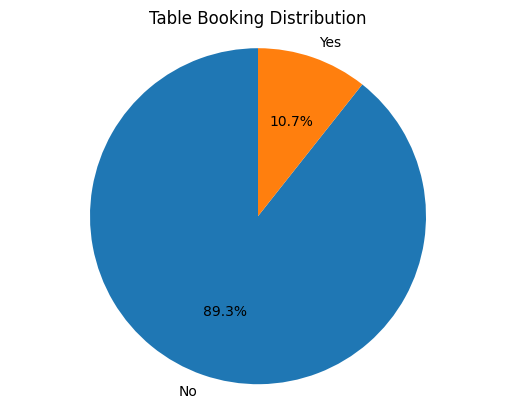

In [95]:
booking_counts = data['table booking'].value_counts()

labels = booking_counts.index
counts = booking_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Table Booking Distribution')

plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'The ratio of restaurants with online orders')

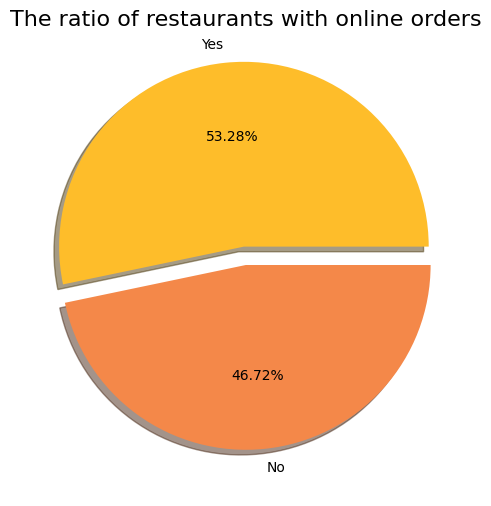

In [96]:
online_order = data['online_order'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.pie(data=online_order, x=online_order.values, labels=online_order.index, autopct='%1.2f%%',
        colors=sns.color_palette('plasma_r'), shadow=True, explode=(0.1, 0))
plt.title('The ratio of restaurants with online orders', fontsize=16)

Text(0.5, 1.0, 'Top 10 types of restaurants by number')

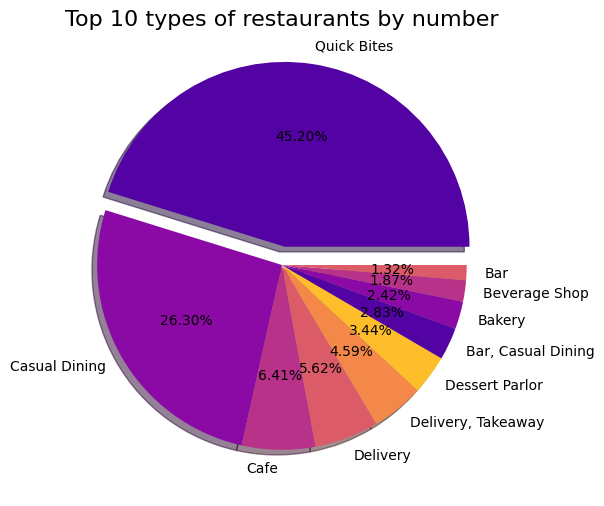

In [97]:
restaurant_type = data['restaurant type'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.pie(data=restaurant_type, x=restaurant_type.values, 
        labels=restaurant_type.index, autopct='%1.2f%%',
        colors=sns.color_palette('plasma'), explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
        shadow=True)
plt.title('Top 10 types of restaurants by number', fontsize=16)

# Insight4
Top restaurants are of type **Quick Bites**

In [98]:
restuarant_type_list = data['restaurant type'].unique()

In [99]:
mean_dict = {}
for i in restuarant_type_list:
    tmp = data[data['restaurant type'] == i]
    mean = np.mean(tmp['avg cost (two people)'])
    mean_dict[i] = mean 

sorted_dict = dict(sorted(mean_dict.items(), key=lambda item: item[1], reverse=True))
rest_type = list(sorted_dict.keys())
rest_mean = list(sorted_dict.values())
print(rest_type[0], rest_mean[0])
print(rest_type[1], rest_mean[1])
print(rest_type[2], rest_mean[2])

Fine Dining, Lounge 3000.0
Fine Dining, Microbrewery 3000.0
Bar, Fine Dining 2862.5


**Fine Dining, Lounge** , **Fine Dining, Microbrewery** and **Bar, Fine Dining** is the best *Restaurant Type* to earn more money

## Preprocessing

In [100]:
data = data.drop(['restaurant name', 'local address'], axis=1)

Encoding

In [101]:
#columns to label encode
data.select_dtypes(include='object')

,restaurant type,online_order,table booking,cuisines type,area
0,Quick Bites,No,No,Fast Food,Bellandur
1,Quick Bites,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala"
2,Cafe,Yes,No,"Cafe, Beverages",Bannerghatta Road
3,Casual Dining,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli
4,Casual Dining,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur
...,...,...,...,...,...
7100,Cafe,Yes,No,"Cafe, Italian, Continental, Burger",Bellandur
7101,Dessert Parlor,Yes,No,Desserts,Brigade Road
7102,"Delivery, Takeaway",No,No,"Turkish, Fast Food, Biryani, Chinese",Malleshwaram
7103,Casual Dining,Yes,No,"North Indian, Mughlai, Chinese",Kammanahalli


In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create and fit label encoders
label_encoders = {}
for category in data.select_dtypes(include='object'):
    label_encoders[category] = LabelEncoder()
    data[category] = label_encoders[category].fit_transform(data[category])

# # Create a label encoder
# encoder1 = LabelEncoder()
# encoder2 = LabelEncoder()
# encoder3 = LabelEncoder()
# encoder4 = LabelEncoder()
# encoder5 = LabelEncoder()
# enc_list = [encoder1,encoder2,encoder3,encoder4,encoder5]

# # Fit the encoder to the categorical columns
# j=0
# for column in data.select_dtypes(include='object'):
#     data[column] = enc_list[j].fit_transform(data[column])
#     j+=1

# Print the encoded dataset
data
# print(j)

,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area
0,56,3.4,7,200.0,0,0,1000,3
1,56,3.9,48,400.0,1,0,1008,6
2,18,3.7,37,400.0,1,0,454,1
3,23,2.7,135,550.0,1,0,354,23
4,23,2.8,40,700.0,1,0,196,3
...,...,...,...,...,...,...,...,...
7100,18,4.3,894,600.0,1,0,575,3
7101,36,4.0,68,250.0,1,0,951,4
7102,35,3.7,33,350.0,0,0,2150,22
7103,23,3.8,191,650.0,1,0,1727,15


<Axes: >

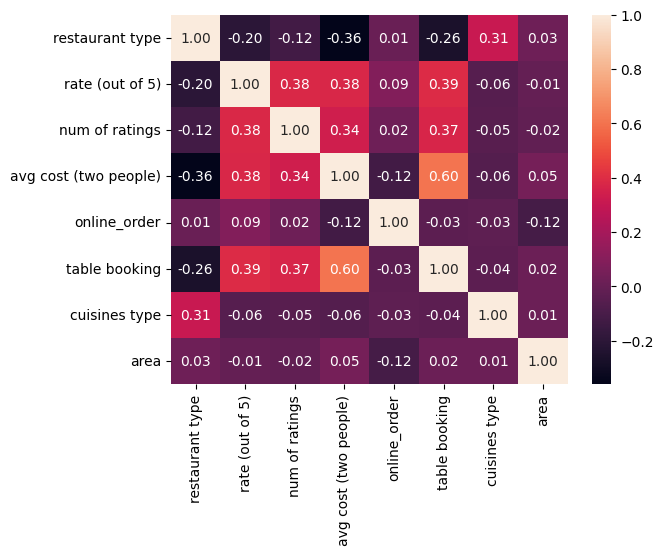

In [103]:
sns.heatmap(data=data.corr(), annot=True, fmt='.2f')

In [104]:
X = data.drop(['avg cost (two people)'], axis=1)
y = data['avg cost (two people)']

In [105]:
from sklearn.preprocessing import StandardScaler

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_normalized.head()

,restaurant type,rate (out of 5),num of ratings,online_order,table booking,cuisines type,area
0,1.028991,-0.246634,-0.308256,-1.067877,-0.345298,-0.261686,-0.905392
1,1.028991,0.832218,-0.239542,0.936437,-0.345298,-0.248739,-0.554756
2,-1.105928,0.400677,-0.257978,0.936437,-0.345298,-1.145342,-1.139149
3,-0.825017,-1.757027,-0.093734,0.936437,-0.345298,-1.307184,1.432183
4,-0.825017,-1.541257,-0.252950,0.936437,-0.345298,-1.562893,-0.905392


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)


In [107]:
X_train

,restaurant type,rate (out of 5),num of ratings,online_order,table booking,cuisines type,area
2787,0,3.1,6,1,0,212,6
6312,56,2.8,40,1,0,1440,5
1134,56,4.0,92,1,0,2005,8
2808,34,3.6,112,1,0,1501,6
349,56,3.6,24,0,0,91,8
...,...,...,...,...,...,...,...
6416,23,3.9,888,1,0,1794,0
4542,34,3.1,44,0,0,1501,1
6747,56,3.2,7,0,0,2031,24
5830,12,3.4,5,0,0,288,14


In [108]:
y_train.head()

2787    200.0
6312    200.0
1134    400.0
2808    400.0
349     250.0
Name: avg cost (two people), dtype: float64

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boosting regressor
regressor = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators= 100)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict the values on the test set
y_pred = regressor.predict(X_test)

# Calculate the score
score = regressor.score(X_test, y_test)

print(score)

0.7739697684419738


import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters for the Random Forest regressor
rf_params = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
}

# Create a GridSearchCV object for the Random Forest regressor
rf_cv = GridSearchCV(estimator=ensemble.RandomForestRegressor(), param_grid=rf_params, cv=5)

# Fit the GridSearchCV object to the training data
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)

# Print the scores of the Random Forest regressor
print("Random Forest regressor scores:")
print(rf_cv.cv_results_["mean_test_score"])
print('Random Forest:',rf_cv.best_params_)
print('Random Forest',rf_cv.best_score_)

# Create a dictionary of hyperparameters for the AdaBoost regressor
ada_params = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1],
}

# Create a GridSearchCV object for the AdaBoost regressor
ada_cv = GridSearchCV(estimator=ensemble.AdaBoostRegressor(), param_grid=ada_params, cv=5)

# Fit the GridSearchCV object to the training data
ada_cv.fit(X_train, y_train)

# Print the scores of the AdaBoost regressor
print("AdaBoost regressor scores:")
print(ada_cv.cv_results_["mean_test_score"])
print('AdaBoost:',ada_cv.best_params_)
print('AdaBoost:',ada_cv.best_score_)

# Create a dictionary of hyperparameters for the Gradient Boosting regressor
gb_params = {
    "n_estimators": [10, 50, 100],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 10],
}

# Create a GridSearchCV object for the Gradient Boosting regressor
gb_cv = GridSearchCV(estimator=ensemble.GradientBoostingRegressor(), param_grid=gb_params, cv=5)

# Fit the GridSearchCV object to the training data
gb_cv.fit(X_train, y_train)

# Print the scores of the Gradient Boosting regressor
print("c regressor scores:")
print(gb_cv.cv_results_["mean_test_score"])
print('Gradient Boosting:',gb_cv.best_params_)
print('Gradient Boosting',gb_cv.best_score_)

In [110]:
def Predict_New(new_data):
    # Define column names
    columns = ['restaurant type', 'rate (out of 5)', 'num of ratings', 'online_order', 'table booking', 'cuisines type','area']

    # Define data types for specific columns using a dictionary
    dtype_dict = {'rate (out of 5)': float, 'num of ratings': int}

    # Create the DataFrame with specified data types
    new_df = pd.DataFrame(new_data, columns=columns)

    # Convert specific columns to the specified data types
    new_df = new_df.astype(dtype_dict)
    
    # Fit the encoder to the categorical columns
    # Create and fit label encoders
    for category in new_df.select_dtypes(include='object'):
        new_df[category] = label_encoders[category].transform(new_df[category])
    
    #Scale the data
    scld = scaler.transform(new_df)
    
    pred_df = pd.DataFrame(regressor.predict(scld))
    new_data = pd.DataFrame(new_data)
    new_data = pd.concat([new_data,pred_df],axis=1)
    new_data.columns = ['restaurant type','rate (out of 5)','num of ratings','online_order','table booking','cuisines type','area','avg cost']
    return new_data
    

In [111]:
Predict_New(
    [['Quick Bites', 3.4, 7, 'No', 'No', 'Fast Food', 'Bellandur'],
     ['Cafe', 5, 40, 'No', 'Yes', 'Biryani', 'Bellandur']]
)

d:\Expertzlab\Intern\deployment\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


,restaurant type,rate (out of 5),num of ratings,online_order,table booking,cuisines type,area,avg cost
0,Quick Bites,3.4,7,No,No,Fast Food,Bellandur,792.686632
1,Cafe,5.0,40,No,Yes,Biryani,Bellandur,1474.263766


In [112]:
import pickle

# Save the model and label encoders to a single pickle file
model_data = {
    'model': regressor,
    'label_encoders': label_encoders,
    'scale': scaler
}

with open('model_and_encoders.pkl', 'wb') as file:
    pickle.dump(model_data, file)